# Business Problem

An E Commerce company or DTH (you can choose either of these two domains) provider is  facing a lot of competition in the current market and it has become a challenge to retain the  existing customers in the current situation. Hence, the company wants to develop a model  through which they can do churn prediction of the accounts and provide segmented offers to the  potential churners. In this company, account churn is a major thing because 1 account can have  multiple customers. hence by losing one account the company might be losing more than one  customer. 

# Objective

You have been assigned to develop a churn prediction model for this company and provide  business recommendations on the campaign. 

Your campaign suggestion should be unique and be very clear on the campaign offer because  your recommendation will go through the revenue assurance team. If they find that you are  giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going  to approve your recommendation.  

Hence be very careful while providing campaign recommendation.


<b> Data Collection </b>
<p>Data provided by the concerned authority in excel format.</P>
<p>1. Dataset name:- Customer Churn Data.</P>
<P>2. File format is:- .xlsx.</p>
<p>3. File Size:- 1.05 MB. </p>
<p>4. Data_source link:- https://docs.google.com/spreadsheets/d/13jiZqUATi4TeVohJpzcKGT0_4Kx3b4Dc/edit?usp=sharing&ouid=107536528581571467047&rtpof=true&sd=true</p> 


## Metadata Information

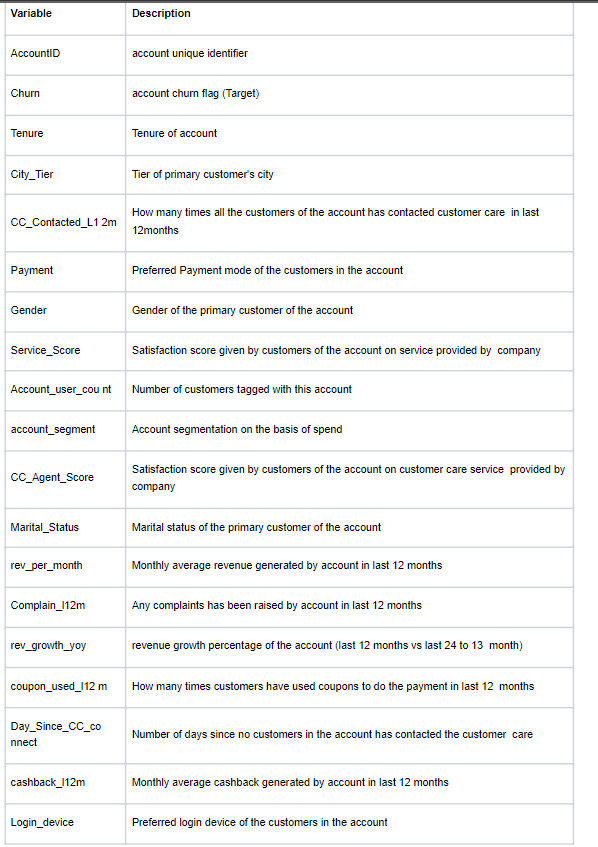

Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Read data into the dataframe

In [2]:
Churn_df = pd.read_excel("Customer Churn Data.xlsx",sheet_name='Data for DSBA')
Churn_df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [ ]:
Churn_df.shape

Dataset has 11260 rows and 19 Columns

In [3]:
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [4]:
Churn_df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [5]:
Churn_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>From the above statistical information, we have found that there are 5 unique payment modes,7 unique account_segments and 3 login devices type which is unique.</p>
<p> It means we have 7 types of subscription plans for our customers.Most of the account_segment are "Super" and payment done by customers is through debit cards in terms of majority.Top login devices is "Mobile".</p>
<p>In terms of Service overall 3 star rating exists.17-18 average times customers have contacted the Customer care in last years.</p>
<p>Given data indicates that 75% of the customers are from Tier 3 cities which shows majority.</P>

We will consider this valuable key points for our further analysis and based on that we would be able to provide campaign recommendation or segmented offers.

In [6]:
Churn_df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

<b>"AccountId"</b> columns is a unique identifier to keep records unique.For the processing & analysis its not going to make a sense.It doesn't have a statistical importance that'why i have dropped the column.

In [7]:
Churn_df.drop(columns='AccountID',inplace= True)

# Data Preprocessing

## Data Cleaning

Checking and dealing with Missing Values

In [8]:
Churn_df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

Most of the columns contains missing values but we know simply delete the Null rowss is not an option. Some features could have null values 

<Axes: >

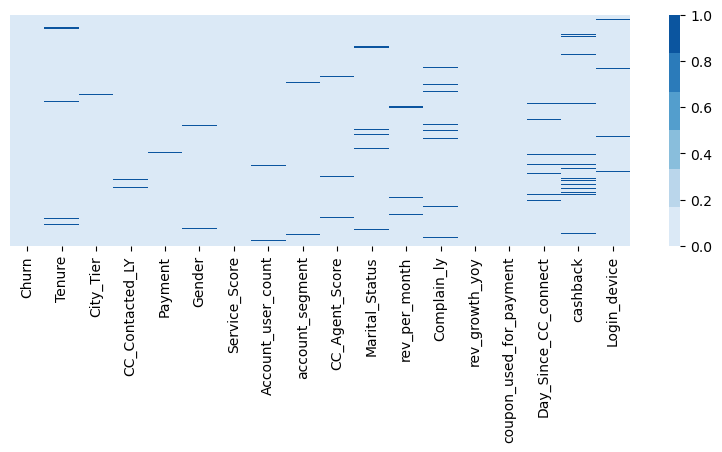

In [9]:

plt.figure(figsize=(10,3))
colormap = sns.color_palette("Blues")
sns.heatmap(Churn_df.isnull(),cmap=colormap,yticklabels=False)


In [10]:
Churn_df['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [11]:
Churn_df['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [12]:
Churn_df['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

Multiple columns contains symbol (<b>'#','@','+','&&&'</b>) which has no meaning in the record.so first we will replace with NaN but we can see except "Tenure" most of the columns contains literals at the same time so its better to delete those rows.Deletion would not be affect or imbalanced the dataset anyhow as we have thousands of records.

In [13]:
Churn_df.loc[Churn_df['Tenure'] == '#', 'Tenure'] = np.NaN
Churn_df.loc[Churn_df['Account_user_count']=='@','Account_user_count'] = np.NaN
Churn_df.loc[Churn_df['rev_per_month']=='+','rev_per_month'] = np.NaN
Churn_df.loc[Churn_df['Login_device']=='&&&&','Login_device'] = np.NaN

In [14]:
Churn_df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               760
dtype: int64

In [15]:
Churn_df.shape

(11260, 18)

In [16]:
Churn_df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [17]:
## Convert datatypes of some features to numeric

columns= ['Account_user_count','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','Tenure']

for col in columns:
    Churn_df[col] = pd.to_numeric(Churn_df[col],errors='coerce')

Its better to drop null records for 'Account_user_count' feature because every account has multiple users associated with it and this is a defined set. We cannot impute directly by mean,mode,median or anything. It could be possible one account is used by 1 person and may be no other users are associate with it.Same with ["CC_Contacted_LY","Complain_ly","Day_Since_CC_connect"] It could be possible some user haven't contacted CC since last 12 month as they wouldn't have faced any issue

In [18]:

Churn_df.dropna(subset=['rev_per_month','Account_user_count','CC_Contacted_LY','Complain_ly','Day_Since_CC_connect','rev_growth_yoy'],inplace= True)

Now we can impute some numerical columns with mean as they represent feedback score and cashback which can be more or less in terms of numbers.

In [19]:
# Impute numerical column with average

numerical_col=['Service_Score','CC_Agent_Score','coupon_used_for_payment','cashback']
for col in numerical_col:
    Churn_df[col]=pd.to_numeric(Churn_df[col],errors='coerce')
    Churn_df[col].fillna(Churn_df[col].mean(),inplace=True)
    


In [20]:
Churn_df.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [21]:
## Checking null values again
Churn_df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             211
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               428
dtype: int64

Now we can see Payment,Login device and City_tier are categorical in nature and could be impute with most frequent value.It shouldn't impact further analysis.so we impute with mode

In [22]:
# Imputation with mode

Churn_df['Login_device'].fillna(Churn_df['Login_device'].mode()[0],inplace=True)

In [23]:
Churn_df['Payment'].fillna(Churn_df['Payment'].mode()[0],inplace= True)

In [24]:
Churn_df['City_Tier'].fillna(Churn_df['City_Tier'].mode()[0],inplace= True)

In [25]:
Churn_df['Marital_Status'] = Churn_df['Marital_Status'].fillna('Not Available')
Churn_df['account_segment'] = Churn_df['account_segment'].fillna('Not Available')
Churn_df['Gender'] = Churn_df['Gender'].fillna('Not Available')


In [26]:
# Checking null values again

Churn_df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device                 0
dtype: int64

In [27]:
# Dealing with inconsistent data in Gender.
Churn_df['Gender'].value_counts()

Male             5583
Female           3659
M                 318
F                 226
Not Available     108
Name: Gender, dtype: int64

In [28]:
Churn_df['Gender'].replace({'F':'Female','M':'Male'},inplace=True)

In [29]:
Churn_df['Gender'].value_counts()

Male             5901
Female           3885
Not Available     108
Name: Gender, dtype: int64

In [30]:
Churn_df.dropna(subset='Tenure',inplace=True)

In [31]:
Churn_df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

Tenure contains values in months which is going upto 99 months.It will be hectic process if we see for monthly level. So we can divide the customers into groups based on tenure for an example for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on.NAN values impacted the grouping the tenure so its better to drop missing values

In [ ]:
# Group the tenure in bins of 12 months
def func(a):
    if a==0:
        return '0'
    b = a // 12
    if (a % 12 == 0):
        b -= 1
    c = 12 * (b + 1)
    return f'{c-11}-{c}'

Churn_df['tenure_period'] = Churn_df['Tenure'].apply(func)

<b>Values distrubtion</b> based on tenure_period

In [ ]:

Churn_df['tenure_period'].value_counts(normalize=True)*100

Around <b>54%</b> customers has 1 yr of tenure which either they are using services(0) or stopped the services(1).<b>11%</b> of the customers has 0 tenure period it typically means that the customer has just started their subscription or has recently signed up for DTH services.They may have recently installed the DTH equipment, activated their subscription(0) or it could be possible that they might have deactivate the account or cancel the subscription just after joining(1).


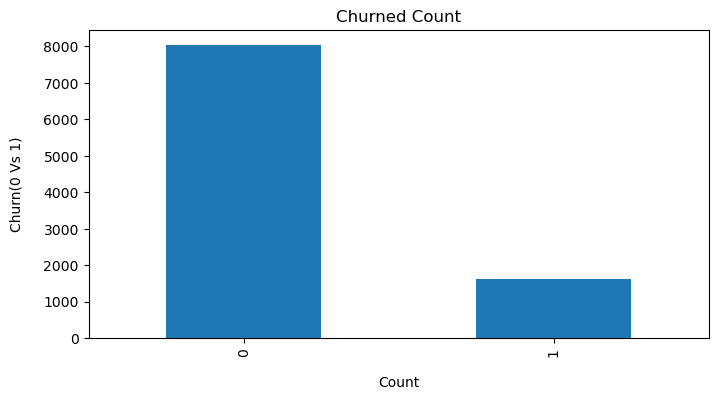

In [32]:
Churn_df['Churn'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn(0 Vs 1)", labelpad=14)
plt.title("Churned Count");

As we can see data is highly imbalanced with the ratio 80-20 in context of churn.We will keep this point in further analysis

In [33]:
Churn_df['Churn'].value_counts(normalize= True)*100

0    83.195535
1    16.804465
Name: Churn, dtype: float64

In [34]:
# Checking Duplicate rows across column

Churn_df.duplicated().sum()

284

# Data Exploration & Analysis

## Univariate 

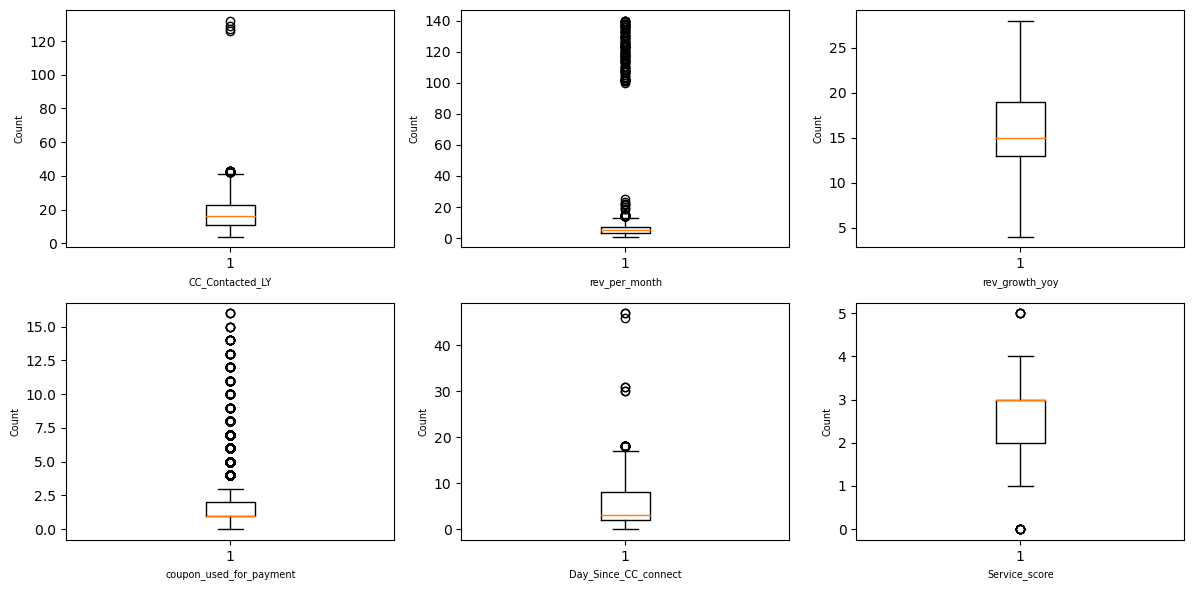

In [35]:
# At first we see distribution of features using box plot to detect outlier

fig,ax = plt.subplots(2,3, figsize=(12, 6))


ax[0,0].boxplot(Churn_df['CC_Contacted_LY'].dropna())
ax[0,0].set_xlabel('CC_Contacted_LY',fontsize=7)
ax[0,0].set_ylabel('Count',fontsize=7)



ax[0,1].boxplot(Churn_df['rev_per_month'])
ax[0,1].set_xlabel('rev_per_month', fontsize=7)
ax[0,1].set_ylabel('Count', fontsize=7)

ax[0,2].boxplot(Churn_df['rev_growth_yoy'])
ax[0,2].set_xlabel('rev_growth_yoy', fontsize=7)
ax[0,2].set_ylabel('Count', fontsize=7)

ax[1,0].boxplot(Churn_df['coupon_used_for_payment'])
ax[1, 0].set_xlabel('coupon_used_for_payment', fontsize=7)
ax[1, 0].set_ylabel('Count', fontsize=7)

ax[1,1].boxplot(Churn_df['Day_Since_CC_connect'])
ax[1, 1].set_xlabel('Day_Since_CC_connect', fontsize=7)
ax[1, 1].set_ylabel('Count', fontsize=7)

ax[1,2].boxplot(Churn_df['Service_Score'])
ax[1, 2].set_xlabel('Service_score', fontsize=7)
ax[1, 2].set_ylabel('Count', fontsize=7)


plt.tight_layout()

plt.show()

<b>Observation</b>:-<p>CC_Contacted_LY we can see pretty large number of times customer have contacted the care since last 12 months.It could be possible that they might have faced multiple issues in terms of services and all.</P>

rev_per_month  have lot of values which is out of the distribution means data is highly skewed for this feature.Huge variation shown in the coupon_used_for_payment.cashback has lot of values which out of the box. We will consider this facts to handle outlier as well.



<b> Check Skewness and Distrbution.</b>

In [36]:
check_skew = ['rev_per_month','rev_growth_yoy','cashback','coupon_used_for_payment']
for i in check_skew:
    print('Skewness of {}:'.format(i),Churn_df[i].skew(skipna=True))


Skewness of rev_per_month: 8.79279824860676
Skewness of rev_growth_yoy: 0.7437559601213813
Skewness of cashback: 8.41185701556492
Skewness of coupon_used_for_payment: 2.5470320884249826


<b>Observation</b>:-
rev_per_month,cashback and coupn_used_for_month are positively(right) highly skewed.it means most of the values are on the left side of the distribution and outliers are on the right side.Those average(mean) are greater than the median and mode will be less.
rev_growth_yoy is not skewed.We can assume as a normal distrubtion.


In [ ]:
sns.distplot(Churn_df['rev_growth_yoy'])
plt.show()


In [ ]:
sns.distplot(Churn_df['rev_per_month'])
plt.show()

In [ ]:
sns.distplot(Churn_df['cashback'])
plt.show()

In [ ]:
sns.distplot(Churn_df['coupon_used_for_payment'])
plt.show()

## Handling Outliers

In [37]:

# Columns with outliers:  'CC_contacted_LY', 'service_score'

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range



In [38]:

# Apply the outliers_remove function to the specified columns
for feature in Churn_df[['CC_Contacted_LY','Service_Score']]:
    lr,ur=treat_outlier(Churn_df[feature])
    Churn_df[feature]=np.where(Churn_df[feature]>ur,ur,Churn_df[feature])
    Churn_df[feature]=np.where(Churn_df[feature]<lr,lr,Churn_df[feature])

In [39]:
Churn_df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

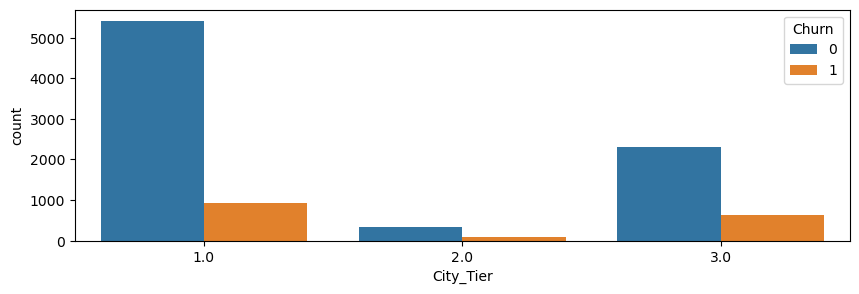

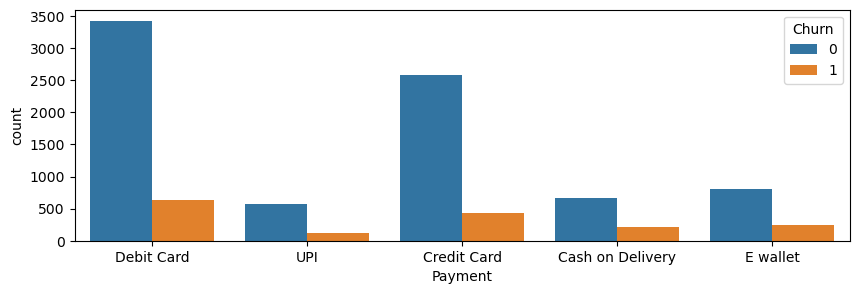

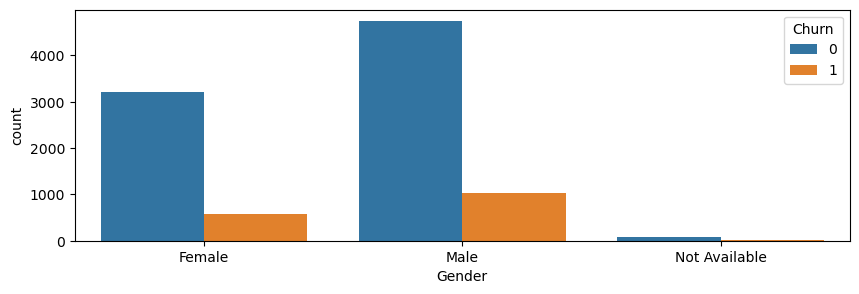

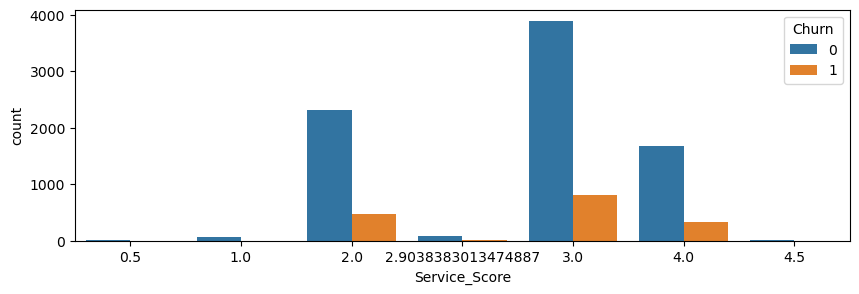

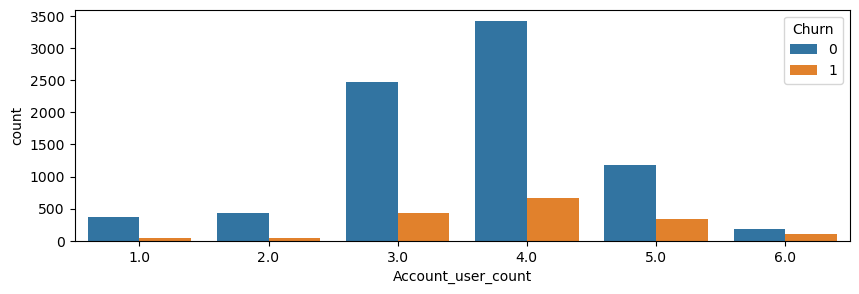

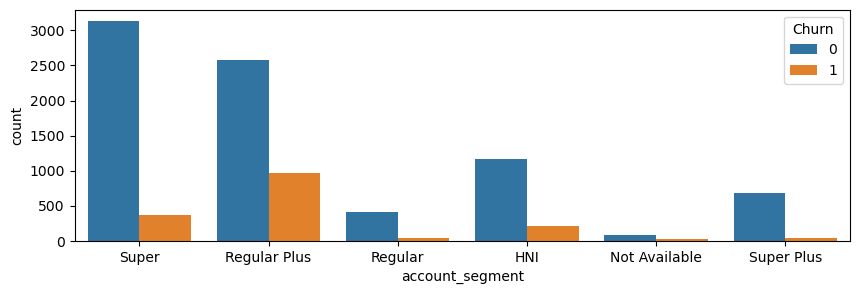

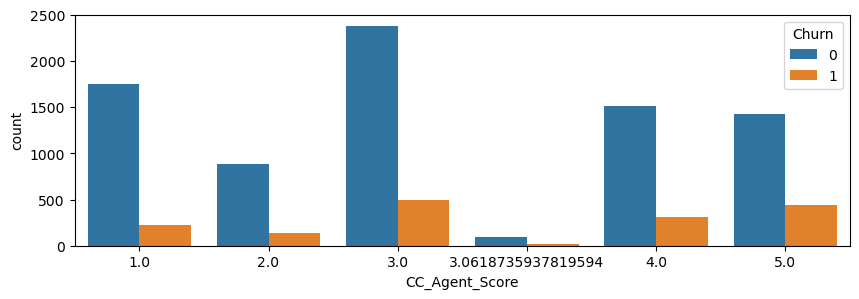

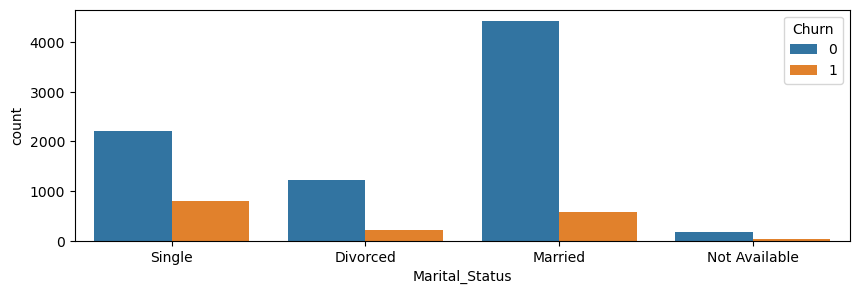

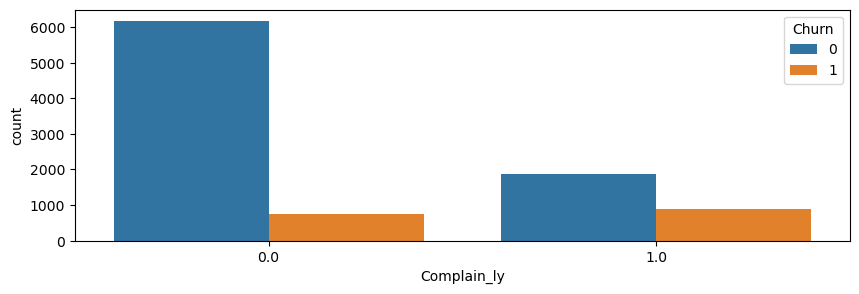

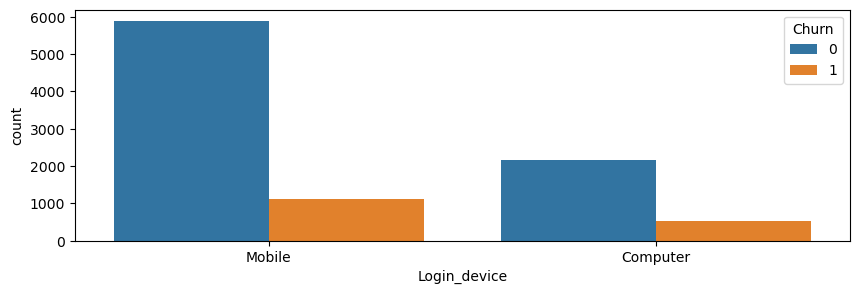

In [40]:
# Univariate distribution based on Churn

for col, features in enumerate(Churn_df.drop(columns=['Tenure','Churn','CC_Contacted_LY','rev_growth_yoy','coupon_used_for_payment','cashback','Day_Since_CC_connect','rev_per_month'])):
    plt.figure(col,figsize=(10,3))
    sns.countplot(data=Churn_df, x=features, hue='Churn')
    
plt.show()

<p>1.Customers from Tier 1 city has major volume of not churned as compared to others.We need to draw our attention on Tier 2 cities because ratio between churn and not churn is pretty close.</p>
<p>2.The more who made payment through Debit card or credit card are not likely to be churned.In the COD(Cash on Delivery) or E wallet,Ratio between churners and not churners are close as compared to others.It means If COD or E-wallet happens customers are more likely to churn.We should recommend customers to purchase online or we can provide discounted offers to increase the engagement of online transaction.</p>
<p>3.On the gender basis mens are not churned majorly because of the volumne here but ratio seems same for both around ~4. We cannot make  conclusion here based on the gender standalone.</p>
<p>4.An account who has 6 more users associate with it,they are more likely to churn but account who has 3-4 users are not churned majorily.</p>
<p>5.if we talk about account segment, We have "super" and regular plus" subscriber who do not churned majorly as compared to others.</p>
<p>6.Customers who are married or couple takes more subscription not churned majorly in terms of others segment.The rate of churners are high in Singles.
<p>7.Those who didn't complained last year hasn't churned majorly.
<p>8.Observation clearly indicates that based on the tenure_period those customers who just signup or activated the account,Means customers who haven't completed months are likely to churn.Churners are high for 0 months.We need to target new customers.customers with a tenure of 0 are valuable as they represent new business opportunities and potential long-term subscribers. It is crucial for the service provider to ensure a smooth onboarding process, provide timely support, and offer attractive benefits to engage and retain these new customers.


## Bivariate Analysis

In [ ]:
sns.pairplot(Churn_df,hue='Churn',dropna=True)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(Churn_df.corr(),cmap='viridis',annot=True)

<b>Observation Results<b>
1. From the heatmap above, it can be obtained that there is a feature correlation with the target, where the target is churn. 
2. The feature that has a high correlation with the churn target is Tenure -0.23. 
3. This includes a negative correlation, meaning that the greater the tenure value, the lower the churn rate. 
4. In addition, the correlation of other features is quite large, namely between churn and complaint_ly of 0.25. Where this includes a positive correlation, meaning that the greater the value of the complaint, the greater the churn rate. 
5. Thus, features that are relevant and must be maintained are tenure and complain_ly features.

## Feature Encoding

In [41]:
## Applying one hot encoding through get_dummies method.
for feature in Churn_df.columns: 
    if Churn_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Churn_df[feature].unique()))
        print(pd.Categorical(Churn_df[feature].unique()).codes)
        Churn_df[feature] = pd.Categorical(Churn_df[feature]).codes



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male', 'Not Available']
Categories (3, object): ['Female', 'Male', 'Not Available']
[0 1 2]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Not Available', 'Super Plus']
Categories (6, object): ['HNI', 'Not Available', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[4 3 2 0 1 5]


feature: Marital_Status
['Single', 'Divorced', 'Married', 'Not Available']
Categories (4, object): ['Divorced', 'Married', 'Not Available', 'Single']
[3 0 1 2]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
Churn_df.shape

 ## Feature Selection

<b>By Checking Multicollinearity & VIF</b>

In [42]:
X= Churn_df.drop(columns='Churn',axis=1)
y = Churn_df['Churn']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [44]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [45]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature        VIF
0                    Tenure   1.744915
1                 City_Tier   4.426687
2           CC_Contacted_LY   5.208313
3                   Payment   4.256475
4                    Gender   2.596632
5             Service_Score  17.933208
6        Account_user_count  14.530211
7           account_segment   5.123793
8            CC_Agent_Score   5.510037
9            Marital_Status   2.815527
10            rev_per_month   1.271998
11              Complain_ly   1.398364
12           rev_growth_yoy  15.439857
13  coupon_used_for_payment   2.187284
14     Day_Since_CC_connect   2.958415
15                 cashback   2.354529
16             Login_device   3.511560


Dropping Variables having VIF>5 and Recheck the VIF Values

In [46]:
X_train = X_train.drop(["Service_Score","Account_user_count","rev_growth_yoy"], axis=1)
X_test = X_test.drop(["Service_Score","Account_user_count","rev_growth_yoy"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (6773, 14)
X_test (2903, 14)


In [47]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature       VIF
0                    Tenure  1.722839
1                 City_Tier  4.311040
2           CC_Contacted_LY  4.608229
3                   Payment  4.101498
4                    Gender  2.530865
5           account_segment  4.695684
6            CC_Agent_Score  5.003251
7            Marital_Status  2.656022
8             rev_per_month  1.262472
9               Complain_ly  1.388100
10  coupon_used_for_payment  2.099019
11     Day_Since_CC_connect  2.907708
12                 cashback  2.329787
13             Login_device  3.338381


<b>By Using Recursive Feature Elimination</b>

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(score_func = chi2, k = "all")
X_train_kbest = chi2_features.fit(X_train, y_train)

X_train_scores = pd.DataFrame(X_train_kbest.scores_,columns=["Score"])
X_train_columns = pd.DataFrame(X_train.columns)

X_train_features_rank = pd.concat([X_train_columns,X_train_scores],axis=1)

X_train_features_rank.columns = ['Features','Score']
X_train_features_rank

,Features,Score
0,Tenure,5479.894179
1,City_Tier,29.249608
2,CC_Contacted_LY,213.738720
3,Payment,1.738715
4,Gender,1.169985
5,account_segment,13.857861
6,CC_Agent_Score,35.544383
7,Marital_Status,146.087141
8,rev_per_month,126.247878
9,Complain_ly,326.637308


## Feature Scaling

In [49]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

Scalr =  MinMaxScaler()


columns = ['CC_Contacted_LY','rev_per_month','rev_growth_yoy','coupon_used_for_payment','cashback','Day_Since_CC_connect']
Churn_df[columns]=Scalr.fit_transform(Churn_df[columns])

In [ ]:
Churn_df

## Imbalanced Dataset

Earlier we found that data is highly imbalanced.Ratio between churned or not chured are high. 80% records are not churn and 20% records churned.We should deal with this to maintain the uniformity for the model training.Imbalanced data refers to a situation where the classes or categories in a dataset are not represented equally.There are multiple approach to deal with imbalanced data.One way using Random oversampling or undersampling technique and other way is to use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. SMOTE generates synthetic examples of the minority class to balance the class distribution.These techniques create synthetic samples based on the existing minority class instances.

In [50]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
from imblearn.over_sampling import SMOTE

In [63]:
# We need to separate the predictors which is X and target variable which is y

X= Churn_df.drop(columns='Churn',axis=1)
y=Churn_df['Churn'] 

In [64]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [65]:
resampled_class_counts = pd.Series(y_resampled).value_counts()
resampled_class_counts

1    8050
0    8050
Name: Churn, dtype: int64

We later use X_resampled ,y_resampled for training and testing data

# Model Building


In [66]:
# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn. model_selection import KFold

In [67]:
# Model Evaluation Classification test

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn. model_selection import cross_validate

def eval_classification(model):
    y_pred = model. predict(X_test)
    y_pred_train = model. predict(X_train)
    y_pred_proba = model. predict_proba(X_test)
    y_pred_proba_train = model. predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt. xlabel('score')
    plt. ylabel('feature')
    plt. title('feature importance score')

def show_best_hyperparameter(model):
    print(model. best_estimator_.get_params())

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=.3, random_state=3)

## Logistic Regression

In [69]:
logistic_model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
logistic_model.fit(X_train, y_train) 

LogisticRegression(random_state=1, solver='liblinear')

In [70]:
y_predict_train = logistic_model.predict(X_train)
log_train_acc = logistic_model.score(X_train, y_train)
log_train_acc

0.785980479148181

In [71]:
y_predict_test = logistic_model.predict(X_test)
log_test_acc = logistic_model.score(X_test, y_test)
log_test_acc

0.7799171842650103

<b>Model Performance</b>

In [72]:
eval_classification(logistic_model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.77
Recall (Test Set): 0.80
F1-Score (Test Set): 0.78
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.86
roc_auc (crossval train): 0.8614212299664376
roc_auc (crossval test): 0.8608436969272392


In [73]:
confusion_matrix(y_train, y_predict_train)

array([[4319, 1299],
       [1113, 4539]], dtype=int64)

In [74]:
confusion_matrix(y_test, y_predict_test)

array([[1842,  590],
       [ 473, 1925]], dtype=int64)

AUC: 0.856


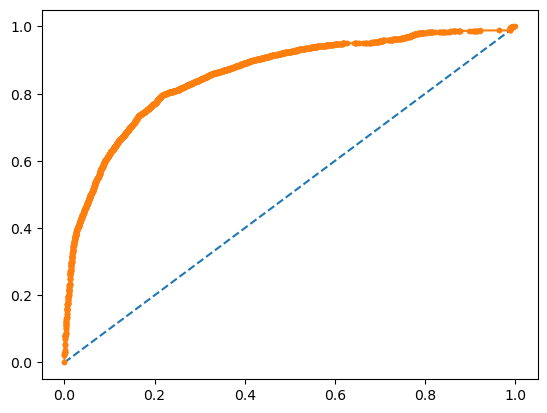

In [75]:
# AUC and ROC for the training data

probs = logistic_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.857


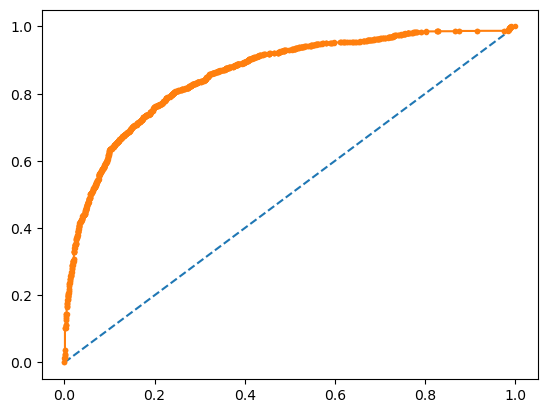

In [76]:
# AUC and ROC for the test data

# predict probabilities
probs = logistic_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

In [77]:
log_metrics=classification_report(y_train, y_predict_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.78
log_train_recall  0.8
log_train_f1  0.79


In [78]:
log_metrics=classification_report(y_test, y_predict_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.77
log_test_recall  0.8
log_test_f1  0.78


## Decision Tree

In [79]:
dtcl = DecisionTreeClassifier(random_state=3)
dtcl.fit(X_train, y_train)


DecisionTreeClassifier(random_state=3)

In [80]:

eval_classification(dtcl)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.97
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9215770652393752


In [81]:
y_predict_train = dtcl.predict(X_train)


In [82]:
y_predict_test = dtcl.predict(X_test)


<b>Model Performance</b>

In [83]:
confusion_matrix(y_train, y_predict_train)

array([[5618,    0],
       [   0, 5652]], dtype=int64)

In [84]:
confusion_matrix(y_test, y_predict_test)

array([[2308,  124],
       [  81, 2317]], dtype=int64)

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=3)

<b>Model Performance</b>

In [87]:
ytrain_predict = rf.predict(X_train)
confusion_matrix(y_train,ytrain_predict)

array([[5618,    0],
       [   0, 5652]], dtype=int64)

In [88]:
ytest_predict = rf.predict(X_test)
confusion_matrix(y_test, ytest_predict)

array([[2381,   51],
       [  18, 2380]], dtype=int64)

In [89]:
eval_classification(rf)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.98
Recall (Test Set): 0.99
F1-Score (Test Set): 0.99
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9964084212932972


<b> Feature Importance</b>

In [90]:
rf_imp = pd.DataFrame(rf.feature_importances_, columns = ["Imp"], 
                      index = X_train.columns).sort_values('Imp',ascending=False)
print(rf_imp)

                              Imp
Tenure                   0.313986
Complain_ly              0.077406
Day_Since_CC_connect     0.065374
rev_per_month            0.060467
cashback                 0.056938
CC_Agent_Score           0.053787
rev_growth_yoy           0.050039
account_segment          0.049705
CC_Contacted_LY          0.047344
Account_user_count       0.040889
coupon_used_for_payment  0.037519
Marital_Status           0.035495
Payment                  0.031437
City_Tier                0.027025
Service_Score            0.022914
Login_device             0.015813
Gender                   0.013862


To avoid false positive churn, we decided to choose a model with the smallest ROC-AUC gap and the highest precision. 
From several model test results, Random Forest is the most suitable algorithm model.

In [ ]:
from sklearn. ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_resampled, y_resampled)

y_pred_over = rf. predict(X_test)
eval_classification(rf)

## Cross-Validation

In [91]:
#K-Fold Cross Validation
#Check Train & Validation in each iteration

kf = KFold(n_splits=5, random_state=3, shuffle=True)
# returns the number of splitting iterations in the cross-validatorprint(kf)
kf.get_n_splits(X) 

5

In [92]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   2    3    4 ... 9673 9674 9675] TEST: [   0    1    9 ... 9662 9670 9671]
TRAIN: [   0    1    2 ... 9673 9674 9675] TEST: [  10   17   22 ... 9642 9644 9656]
TRAIN: [   0    1    2 ... 9672 9674 9675] TEST: [   4    6    8 ... 9664 9667 9673]
TRAIN: [   0    1    4 ... 9673 9674 9675] TEST: [   2    3    5 ... 9668 9669 9672]
TRAIN: [   0    1    2 ... 9671 9672 9673] TEST: [   7   11   14 ... 9666 9674 9675]


In [93]:
#Cross Validation in Validation Set Only
model = RandomForestClassifier()
result = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
result.mean()

0.9951176599856139

In [ ]:
#Cross Validation in Train Set & Validation Set
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

After k-fold cross validation, the model is best-fit, as can be seen from the train scores and test scores, which have very small differences.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=.3, random_state=3)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=3)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=3, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

In [ ]:
#Learning Curves
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np. linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
    model.fit(X_train_smote, y_train_smote)

    # eval on train
    y_pred_train_proba = model. predict_proba(X_train_smote)
    train_auc = roc_auc_score(y_train_smote, y_pred_train_proba[:,1])
    train_scores. append(train_auc)

    # eval on test
    y_pred_proba = model. predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores. append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt. plot(param_values, train_scores, label='Train')
plt. plot(param_values, test_scores, label='Test')
plt. ylabel('AUC')
plt. xlabel('RandomForest')
plt. legend()
plt. show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

## Feature Importance

In [ ]:
conda install -c "conda-forge/label/cf202003" shap

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

In [ ]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
#
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()